In [1]:
!pip install split_folders

In [1]:
import splitfolders

In [3]:
input_folder = r"E:\ML\IBM hackathon research-forensic\data_subset\Authors"
output = r"E:\ML\IBM hackathon research-forensic\data_subset\Authors-processed_data"
splitfolders.ratio(input_folder, output, seed=42, ratio=(.6, .2, .2))

Copying files: 2746 files [00:49, 55.64 files/s]


In [ ]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Activation, Dense, Dropout

In [3]:
img_height, img_width = (224,224)
batch_size = 32

train_data_dir = r"E:\ML\IBM hackathon research-forensic\data_subset\Authors-processed_data\train"
valid_data_dir = r"E:\ML\IBM hackathon research-forensic\data_subset\Authors-processed_data\val"
test_data_dir = r"E:\ML\IBM hackathon research-forensic\data_subset\Authors-processed_data\test"

(101, 1079)

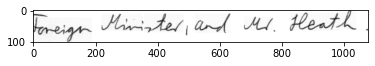

In [3]:
import cv2
import matplotlib.pyplot as plt
# read image
img = cv2.imread(r'E:\ML\IBM hackathon research-forensic\data_subset\Authors-processed_data\val\a02\a02-020-s00-02.png', cv2.IMREAD_UNCHANGED)
plt.imshow(img, cmap="gray")

img.shape


In [4]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size=(img_height, img_width),
batch_size=batch_size,
class_mode='categorical',
subset='training') # set as training data

valid_generator = train_datagen.flow_from_directory(
valid_data_dir, # some directory as training data
target_size=(img_height, img_width),
batch_size=batch_size,
class_mode='categorical',
subset='validation') # set as validation data

Found 990 images belonging to 12 classes.
Found 213 images belonging to 12 classes.


In [5]:
test_generator = train_datagen.flow_from_directory(
test_data_dir, # some directory as training data
target_size=(img_height, img_width),
batch_size=1,
class_mode='categorical',
subset='validation') # set as validation data

Found 217 images belonging to 12 classes.


In [6]:
x,y = test_generator.next()
x.shape

(1, 224, 224, 3)

In [7]:
input_shape=x.shape[1:]
input_shape

(224, 224, 3)

In [6]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_generator,
         epochs = 10)

Epoch 1/10
31/31 [==============================] - 117s 3s/step - loss: 2.9890 - accuracy: 0.2498
Epoch 2/10
31/31 [==============================] - 105s 3s/step - loss: 1.3157 - accuracy: 0.5520
Epoch 3/10
31/31 [==============================] - 108s 3s/step - loss: 0.9955 - accuracy: 0.6575
Epoch 4/10
31/31 [==============================] - 108s 3s/step - loss: 1.0415 - accuracy: 0.6170
Epoch 5/10
31/31 [==============================] - 108s 3s/step - loss: 0.7786 - accuracy: 0.7537
Epoch 6/10
31/31 [==============================] - 105s 3s/step - loss: 0.6945 - accuracy: 0.7596
Epoch 7/10
31/31 [==============================] - 105s 3s/step - loss: 0.6404 - accuracy: 0.7955
Epoch 8/10
31/31 [==============================] - 104s 3s/step - loss: 0.6286 - accuracy: 0.7725
Epoch 9/10
31/31 [==============================] - 106s 3s/step - loss: 0.5959 - accuracy: 0.8027
Epoch 10/10
31/31 [==============================] - 105s 3s/step - loss: 0.5498 - accuracy: 0.8105


In [12]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)


217/217 - 33s - loss: 1.1817 - accuracy: 0.6313

Test accuracy: 0.6313363909721375


In [11]:
model.fit(valid_generator, epochs=10, batch_size=10)


Epoch 1/10
7/7 [==============================] - 24s 3s/step - loss: 1.7289 - accuracy: 0.4836
Epoch 2/10
7/7 [==============================] - 24s 3s/step - loss: 1.3243 - accuracy: 0.5258
Epoch 3/10
7/7 [==============================] - 24s 3s/step - loss: 0.9833 - accuracy: 0.6667
Epoch 4/10
7/7 [==============================] - 23s 3s/step - loss: 0.8118 - accuracy: 0.7371
Epoch 5/10
7/7 [==============================] - 24s 3s/step - loss: 0.7382 - accuracy: 0.7746
Epoch 6/10
7/7 [==============================] - 24s 3s/step - loss: 0.6366 - accuracy: 0.7934
Epoch 7/10
7/7 [==============================] - 24s 3s/step - loss: 0.5053 - accuracy: 0.8498
Epoch 8/10
7/7 [==============================] - 24s 3s/step - loss: 0.4935 - accuracy: 0.8498
Epoch 9/10
7/7 [==============================] - 24s 3s/step - loss: 0.5129 - accuracy: 0.8263
Epoch 10/10
7/7 [==============================] - 24s 3s/step - loss: 0.4682 - accuracy: 0.8404


In [13]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_generator,
         epochs = 20)

Epoch 1/20
31/31 [==============================] - 117s 3s/step - loss: 2.9634 - accuracy: 0.2347
Epoch 2/20
31/31 [==============================] - 108s 3s/step - loss: 1.5343 - accuracy: 0.4804
Epoch 3/20
31/31 [==============================] - 104s 3s/step - loss: 1.2454 - accuracy: 0.5681
Epoch 4/20
31/31 [==============================] - 101s 3s/step - loss: 1.1810 - accuracy: 0.5698
Epoch 5/20
31/31 [==============================] - 107s 3s/step - loss: 1.0742 - accuracy: 0.6165
Epoch 6/20
31/31 [==============================] - 109s 3s/step - loss: 0.9488 - accuracy: 0.6749
Epoch 7/20
31/31 [==============================] - 108s 3s/step - loss: 0.8971 - accuracy: 0.6751
Epoch 8/20
31/31 [==============================] - 109s 3s/step - loss: 0.7639 - accuracy: 0.7532
Epoch 9/20
31/31 [==============================] - 107s 3s/step - loss: 0.7639 - accuracy: 0.7362
Epoch 10/20
31/31 [==============================] - 107s 3s/step - loss: 0.7178 - accuracy: 0.7464
Epoch 11/

In [14]:
model.fit(valid_generator, epochs=20, batch_size=10)

Epoch 1/20
7/7 [==============================] - 22s 3s/step - loss: 2.2512 - accuracy: 0.4789
Epoch 2/20
7/7 [==============================] - 23s 3s/step - loss: 1.4278 - accuracy: 0.5023
Epoch 3/20
7/7 [==============================] - 23s 3s/step - loss: 1.1261 - accuracy: 0.6244
Epoch 4/20
7/7 [==============================] - 23s 3s/step - loss: 1.0565 - accuracy: 0.6150
Epoch 5/20
7/7 [==============================] - 24s 3s/step - loss: 0.9768 - accuracy: 0.6620
Epoch 6/20
7/7 [==============================] - 24s 3s/step - loss: 0.7873 - accuracy: 0.7042
Epoch 7/20
7/7 [==============================] - 24s 3s/step - loss: 0.6981 - accuracy: 0.7512
Epoch 8/20
7/7 [==============================] - 24s 3s/step - loss: 0.6477 - accuracy: 0.7700
Epoch 9/20
7/7 [==============================] - 24s 3s/step - loss: 0.5981 - accuracy: 0.8075
Epoch 10/20
7/7 [==============================] - 24s 3s/step - loss: 0.6840 - accuracy: 0.7793
Epoch 11/20
7/7 [======================

In [15]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)


217/217 - 27s - loss: 1.3107 - accuracy: 0.6590

Test accuracy: 0.6589861512184143


In [21]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.50)(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_generator, 
         epochs = 50)

Epoch 1/50
31/31 [==============================] - 89s 3s/step - loss: 2.8050 - accuracy: 0.1974
Epoch 2/50
31/31 [==============================] - 92s 3s/step - loss: 1.8919 - accuracy: 0.3171
Epoch 3/50
31/31 [==============================] - 96s 3s/step - loss: 1.5875 - accuracy: 0.4498
Epoch 4/50
31/31 [==============================] - 110s 4s/step - loss: 1.3869 - accuracy: 0.5399
Epoch 5/50
31/31 [==============================] - 103s 3s/step - loss: 1.3387 - accuracy: 0.5164
Epoch 6/50
31/31 [==============================] - 103s 3s/step - loss: 1.2239 - accuracy: 0.5223
Epoch 7/50
31/31 [==============================] - 107s 3s/step - loss: 1.0604 - accuracy: 0.6284
Epoch 8/50
31/31 [==============================] - 106s 3s/step - loss: 1.0790 - accuracy: 0.6241
Epoch 9/50
31/31 [==============================] - 109s 4s/step - loss: 1.0383 - accuracy: 0.6278
Epoch 10/50
31/31 [==============================] - 112s 4s/step - loss: 0.9339 - accuracy: 0.6689
Epoch 11/50


In [22]:
model.fit(valid_generator, epochs=50, batch_size=10)

Epoch 1/50
7/7 [==============================] - 17s 3s/step - loss: 2.7188 - accuracy: 0.4507
Epoch 2/50
7/7 [==============================] - 18s 2s/step - loss: 1.7147 - accuracy: 0.4319
Epoch 3/50
7/7 [==============================] - 19s 3s/step - loss: 1.3893 - accuracy: 0.5023
Epoch 4/50
7/7 [==============================] - 21s 3s/step - loss: 1.2715 - accuracy: 0.5493
Epoch 5/50
7/7 [==============================] - 20s 3s/step - loss: 1.1665 - accuracy: 0.5962
Epoch 6/50
7/7 [==============================] - 21s 3s/step - loss: 1.0349 - accuracy: 0.6573
Epoch 7/50
7/7 [==============================] - 21s 3s/step - loss: 0.9591 - accuracy: 0.6009
Epoch 8/50
7/7 [==============================] - 20s 3s/step - loss: 0.9079 - accuracy: 0.6714
Epoch 9/50
7/7 [==============================] - 22s 3s/step - loss: 0.8699 - accuracy: 0.7183
Epoch 10/50
7/7 [==============================] - 21s 3s/step - loss: 0.8054 - accuracy: 0.7136
Epoch 11/50
7/7 [======================

In [23]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)


217/217 - 37s - loss: 1.2193 - accuracy: 0.6959

Test accuracy: 0.695852518081665


In [24]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [25]:
model.save('IAM.h5')

In [26]:
from tensorflow.keras.models import load_model
new_model = load_model('IAM.h5')

In [28]:
new_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

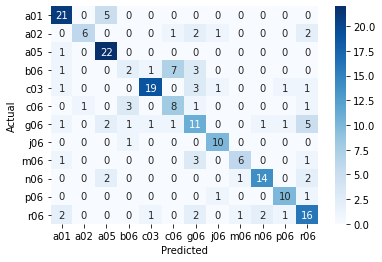

Test accuracy : 66.82027649769586


In [7]:
import pandas as pd
import seaborn as sns
import tensorflow as tf

model = tf.keras.models.load_model(r"E:\ML\IBM hackathon research-forensic\data_subset\IAM.h5")
filenames = test_generator.filenames
nb_samples = len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
    X_test,Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix,cmap='Blues', annot=True,fmt='d')
plt.show()
print('Test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [9]:
import keras
img = keras.preprocessing.image.load_img(r'E:\ML\IBM hackathon research-forensic\data_subset\Authors\a01\a01-003u-s01-04.png')
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
class_names = ['A01', 'A02', 'A05', 'B06', 'C03', 'C06','G06','J06','M06','N06','P06','R06']
score = tf.nn.softmax(predictions[0])
class_names[np.argmax(score)]

'P06'

In [16]:
import keras
img = keras.preprocessing.image.load_img(r'E:\ML\IBM hackathon research-forensic\data_subset\Authors-processed_data\train\b06\b06-056-s00-00.png')
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
class_names = ['A01', 'A02', 'A05', 'B06', 'C03', 'C06','G06','J06','M06','N06','P06','R06']
score = tf.nn.softmax(predictions[0])
class_names[np.argmax(score)]

'P06'

In [13]:
filenames

['a01\\a01-000u-s00-03.png',
 'a01\\a01-003u-s01-00.png',
 'a01\\a01-003u-s01-01.png',
 'a01\\a01-003u-s01-03.png',
 'a01\\a01-003u-s01-04.png',
 'a01\\a01-007u-s00-01.png',
 'a01\\a01-007u-s01-00.png',
 'a01\\a01-011u-s00-02.png',
 'a01\\a01-011u-s00-03.png',
 'a01\\a01-011u-s01-01.png',
 'a01\\a01-014u-s00-00.png',
 'a01\\a01-014u-s01-00.png',
 'a01\\a01-014u-s02-00.png',
 'a01\\a01-014u-s03-00.png',
 'a01\\a01-014u-s04-00.png',
 'a01\\a01-020u-s00-01.png',
 'a01\\a01-020u-s02-01.png',
 'a01\\a01-026u-s00-01.png',
 'a01\\a01-026u-s02-00.png',
 'a01\\a01-026u-s02-02.png',
 'a01\\a01-030u-s00-00.png',
 'a01\\a01-043u-s00-01.png',
 'a01\\a01-043u-s01-02.png',
 'a01\\a01-043u-s04-00.png',
 'a01\\a01-043u-s04-03.png',
 'a01\\a01-049u-s00-00.png',
 'a02\\a02-017-s00-00.png',
 'a02\\a02-017-s01-02.png',
 'a02\\a02-017-s01-03.png',
 'a02\\a02-020-s00-00.png',
 'a02\\a02-024-s01-01.png',
 'a02\\a02-024-s01-02.png',
 'a02\\a02-027-s00-00.png',
 'a02\\a02-027-s00-02.png',
 'a02\\a02-027-s03-01.

In [14]:
score

<tf.Tensor: shape=(12,), dtype=float32, numpy=
array([0.07563975, 0.0757563 , 0.07552669, 0.07720173, 0.07582581,
       0.0756048 , 0.07828624, 0.07591554, 0.07560074, 0.07689998,
       0.11675594, 0.12098652], dtype=float32)>